In [11]:
import timeit
import math
import matplotlib.pyplot as plt
import numpy as np
import random

# Programação Estruturada

### 1) Faça um programa iterativo e outro recursivo para fatorar um número inteiro.

In [12]:
def fatorar_it(n):
    # Inicializamos a lista de fatores primos e o divisor
    fatores = []
    div = 2

    # Enquanto o divisor for menor ou igual ao número, o loop continua
    # O loop verifica se o número é divisível pelo divisor atual (começando com 2)
    while div <= n:
        # Se for, o divisor é adicionado à lista de fatores primos e o número é dividido por ele
        if n % div == 0:
            fatores.append(div)
            n = n / div
        # Se não for, o divisor é incrementado em 1 e o loop continua
        else:
            div += 1
    return fatores


def fatorar_rec(n, div=2):
    # Caso base
    if n == 1:
        return []
    # Caso recursivo
    # Se o número for divisível pelo divisor, 
    # retorna uma lista com o divisor + o resultado da função chamada com o número dividido pelo divisor
    elif n % div == 0:
        return [div] + fatorar_rec(n / div, div)
    # Se o número não for divisível pelo divisor,
    # retorna a função chamada com o número e o divisor incrementado em 1
    else:
        return fatorar_rec(n, div + 1)

In [13]:
'''
Fatorando o número 441, temos:

441 | 3
147 | 3
49  | 7
7   | 7
1   | 1
'''

fatores_it = fatorar_it(441)
fatores_rec = fatorar_rec(441)

print(f"Decomposição de 441: {fatores_it}")
print(f"Decomposição de 441: {fatores_rec}")

Decomposição de 441: [3, 3, 7, 7]
Decomposição de 441: [3, 3, 7, 7]


### 2) Calcule a potencia de um número usando recursão. Pense numa solução eficiente.

In [14]:
"""
Essa versão é ineficiente porque usa um loop que multiplica base por si mesma expoente vezes para calcular a potência. 
Ou seja, para calcular base elevado a n, essa função faz n multiplicações. Isso resulta em uma complexidade assintótica de O(n).
"""


def potencia_iterativa_ineficiente(base, expoente):
    resultado = 1
    for _ in range(expoente):
        resultado *= base
    return resultado


"""
Essa abordagem é recursiva, mas ainda ineficiente.
Se o expoente for 0, a função retorna 1. Esse é o caso base.
Se o expoente for maior que 0, a função retorna base multiplicada pelo resultado da função chamada com base e expoente - 1.
Isso significa que ainda são feitas n multiplicações para calcular base elevado a n. Isso resulta em uma complexidade assintótica de O(n).
"""


def potencia_recursiva_ineficiente(base, expoente):
    if expoente == 0:  # caso base: qualquer número elevado a 0 é 1
        return 1
    else:
        return base * potencia_recursiva_ineficiente(base, expoente - 1)


"""
Essa abordagem é recursiva e eficiente.
Se o expoente for 0, a função retorna 1. Esse é o caso base.
Se o expoente for par, a função retorna o resultado da função chamada com base e expoente divididos por 2, elevado ao quadrado.
Se o expoente for ímpar, a função retorna base multiplicada pelo resultado da função chamada com base e expoente - 1 divididos por 2, elevado ao quadrado.
Essa abordagem é eficiente pois reduz o número de chamadas recursivas pela metade a cada vez que o expoente é dividido por 2, resultando em uma complexidade assintótica de O(log n).
Chamamos isso de divisão e conquista: dividimos o problema em subproblemas menores e resolvemos cada subproblema recursivamente.
"""


def potencia_recursiva(base, expoente):
    if expoente == 0:  # caso base: qualquer número elevado a 0 é 1
        return 1

    elif expoente % 2 == 0:  # caso expoente é par
        temp = potencia_recursiva(base, expoente // 2)
        return temp * temp

    else:  # caso expoente é ímpar
        temp = potencia_recursiva(base, (expoente - 1) // 2)
        return base * temp * temp

In [15]:
print(potencia_iterativa_ineficiente(2,4))
print(potencia_recursiva_ineficiente(2,4))
print(potencia_recursiva(2,4))

print("\nTempo de execução:")
print(timeit.timeit(lambda: potencia_iterativa_ineficiente(99, 1000), number=1000), "segundos\n")
print(timeit.timeit(lambda: potencia_recursiva_ineficiente(99, 1000), number=1000), "segundos\n")
print(timeit.timeit(lambda: potencia_recursiva(99, 1000), number=1000), "segundos\n")


16
16
16

Tempo de execução:
0.24277095799334347 segundos

0.2778215839935001 segundos

0.011994750006124377 segundos



### 3) Project Euler 2: Ache a soma de todos os elementos da série de Fibonacci pares que não excedem 4 milhões. 
Existe uma solução mais interessante que essa que você possivelmente apresentou?

In [16]:
# Essa é uma pergunta que tem resposta correta, mas pode ser solucionada de várias formas.
# O resultado é 4613732.

def fib1():
    # x e y são os dois primeiros termos da sequência de Fibonacci
    x = 0
    y = 1
    prox_termo = 0
    soma = 0
    # Enquanto o próximo termo for menor que 4 milhões, o loop continua
    while prox_termo < 4000000:
        # O próximo termo é a soma dos dois termos anteriores
        prox_termo = x + y
        # O primeiro termo passa a ser o segundo termo
        x = y
        y = prox_termo
        # Se o próximo termo for par, soma ele à soma dos termos pares
        if prox_termo % 2 == 0:
            soma += prox_termo
    return soma

def fib2():
    # O primeiro par é 2 e o segundo par é 8
    # Cada terceiro elemento na sequência de Fibonacci é par
    primeiro_par = 2
    segundo_par = 8
    soma_pares = primeiro_par + segundo_par
    # Enquanto o próximo par for menor que 4 milhões, o loop continua
    while soma_pares < 4000000:
        # Para o número par n, a equação abaixo é válida:
        fib_pares = (4 * segundo_par) + primeiro_par
        soma_pares += fib_pares
        primeiro_par, segundo_par = segundo_par, fib_pares
    return soma_pares

In [17]:
print(fib1())
print(fib2())

print("\nTempo de execução:")
print(timeit.timeit(lambda: fib1(), number=10000), "segundos\n")
print(timeit.timeit(lambda: fib2(), number=10000), "segundos\n")


4613732
4613732

Tempo de execução:
0.014468207984464243 segundos

0.004433708003489301 segundos



### 4) Project Euler 3: Os fatores primos de 13195 são 5, 7, 13 e 29. Qual o maior primo fator de 600851475143? 
Existe uma solução mais interessante que essa que você possivelmente apresentou?

In [18]:
def sol1():
    # Função que verifica se um número é primo
    def for_primo(num):
        # Se o número for menor que 2, ele não é primo
        if num < 2:
            return False
        # Se o número for divisível por qualquer número entre 2 e a raiz quadrada do número, ele não é primo
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                return False
        return True

    n = 600851475143
    fator_primo_max = 1

    # Iteramos de 2 até a raiz quadrada de n + 1
    for i in range(2, int(n**0.5) + 1):
        # Se n for divisível por i, verificamos se i é primo e se i é maior que fator_primo_max
        if n % i == 0:
            if for_primo(i) and i > fator_primo_max:
                # se as duas condições forem verdadeiras, atualizamos fator_primo_max
                fator_primo_max = i

    return fator_primo_max


""" 
Esta é uma solução alternativa, muito mais eficiente.
A solução começa inicializando o número dado n e um fator i=2. O loop externo itera enquanto i*i<n, o que significa que só precisamos verificar fatores até a raiz quadrada de n.
Dentro do loop externo, temos outro loop que divide n por i enquanto é divisível sem resto. Isso remove todos os fatores de i de n. 
Quando este loop interno termina, sabemos que ou n não tem mais fatores de i restantes ou n em si se tornou um número menor porque o dividimos por i.
Em seguida, incrementamos i em 1 e continuamos com o loop externo para verificar o próximo fator.
Finalmente, a função retorna n, que será o maior fator primo de n original quando o loop externo terminar. 
Isso ocorre porque quaisquer fatores menores que i já foram divididos de n e quaisquer fatores maiores que i já foram encontrados e divididos em uma iteração anterior do loop externo.

Esta abordagem é mais rápida que a solução anterior porque elimina a verificação de primalidade para cada fator. 
Em vez disso, ele divide diretamente todos os fatores até atingir o maior fator primo. Isso resulta em uma aceleração significativa para valores de entrada maiores.
"""


def sol2():
    n = 600851475143
    i = 2
    while i * i < n:
        while n % i == 0:
            n = n // i
        i = i + 1
    return n

In [19]:
print(sol1())
print(sol2())

print("\nTempo de execução:")
print(timeit.timeit(lambda: sol1(), number=100), "segundos\n")
print(timeit.timeit(lambda: sol2(), number=100), "segundos\n")

6857
6857

Tempo de execução:
2.2655071249755565 segundos

0.0072565410227980465 segundos



# Coleções de Dados

### 1) Implemente o algoritmo conhecido como Bubble sort na forma iterativa e recursiva.

In [20]:
# Iterative Bubble Sort
def bubble_sort_iterativo(arr):
    n = len(arr)

    # Iterando por todos os elementos do array
    for i in range(n - 1):
        # Os últimos i elementos já estão no lugar
        for j in range(n - i - 1):
            # Trocar se o elemento encontrado for maior que o próximo elemento
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return arr


def bubble_sort_recursivo(arr, n=None):
    # Define o valor padrão de n para a chamada inicial
    if n is None:
        n = len(arr)

    # Caso base: Se a lista tiver tamanho 1, ela já está ordenada
    if n == 1:
        return arr

    # Iteramos por todos os elementos da lista, exceto o último
    for i in range(n - 1):
        # Verificamos se o elemento atual é maior do que o próximo elemento
        if arr[i] > arr[i + 1]:
            arr[i], arr[i + 1] = arr[i + 1], arr[i]

    # Chamada recursiva para os elementos restantes da lista
    return bubble_sort_recursivo(arr, n - 1)


In [21]:
# generate large list
arr = [random.randint(0, 1000) for i in range(1000)]
print(arr)

#sort
print(bubble_sort_iterativo(arr))
print(bubble_sort_recursivo(arr))

[459, 675, 79, 281, 652, 427, 240, 646, 348, 820, 979, 291, 742, 759, 358, 802, 256, 424, 713, 159, 925, 481, 793, 189, 771, 502, 504, 751, 248, 1000, 971, 936, 555, 539, 717, 581, 685, 817, 324, 1000, 806, 644, 0, 906, 357, 568, 792, 247, 524, 648, 36, 337, 881, 132, 377, 129, 800, 309, 540, 56, 83, 540, 665, 1000, 787, 53, 327, 679, 597, 21, 503, 726, 270, 980, 833, 553, 861, 532, 45, 59, 625, 80, 561, 977, 942, 405, 492, 105, 903, 901, 758, 121, 915, 251, 747, 575, 198, 675, 629, 609, 435, 238, 788, 813, 399, 745, 777, 779, 953, 297, 571, 14, 701, 316, 614, 541, 747, 10, 950, 74, 599, 224, 284, 991, 486, 748, 592, 766, 108, 381, 645, 133, 738, 900, 451, 41, 961, 802, 895, 109, 286, 543, 697, 362, 162, 175, 927, 836, 992, 948, 175, 675, 417, 12, 775, 678, 28, 922, 653, 602, 61, 335, 66, 242, 732, 281, 253, 372, 552, 375, 7, 525, 287, 160, 928, 303, 739, 90, 429, 940, 442, 456, 500, 871, 147, 841, 37, 736, 225, 202, 532, 240, 981, 479, 375, 112, 475, 545, 934, 860, 932, 612, 124, 955,

### 2) Faça um programa iterativo e outro recursivo para testar se um número é um palíndromo.

In [22]:
def checar_palindromo_iterativo(num):
    # Convertemos o número em uma string para facilitar a comparação
    num_str = str(num)

    # Inicializamos dois ponteiros no início e no fim da string
    left = 0
    right = len(num_str) - 1

    # Comparamos os caracteres das duas extremidades, movendo em direção ao centro
    while left < right:
        # Se os caracteres nas posições atuais não forem iguais, não é um palíndromo
        if num_str[left] != num_str[right]:
            return False

        # Movemos os ponteiros para mais perto do centro
        left += 1
        right -= 1

    return True


def checar_palindromo_recursivo(num):
    # Convertemos o número em uma string para facilitar a comparação
    num_str = str(num)

    # Caso base: Se a string tiver 0 ou 1 caractere, é um palíndromo
    if len(num_str) <= 1:
        return True

    # Caso recursivo: Verificamos se o primeiro e último caracteres são iguais
    if num_str[0] != num_str[-1]:
        return False

    # Chamada recursiva: Verificamos se a substring sem o primeiro e último caracteres é um palíndromo
    return checar_palindromo_recursivo(num_str[1:-1])

### 3) Faça um programa iterativo e outro recursivo para calcular a raiz digital de um número.
A raiz digital de um inteiro n é dividido como o resultado da soma dos dígitos
repetidamente até que apenas um único dígito sobra. Por exemplo, a raiz
digital de 3799 pode ser calculada como:
- Passo 1: 3+7+9+9=28
- Passo 2: 2+8=10
- Passo 3: 1+0=1

In [23]:
# Implementação iterativa
def calcular_raiz_digital_iterativa(num):
    # Continua calculando a raiz digital até que reste apenas um dígito
    while num >= 10:
        # Converte o número em uma lista de dígitos
        digitos = [int(d) for d in str(num)]
        
        # Soma os dígitos
        num = sum(digitos)
    
    return num


# Implementação recursiva
def calcular_raiz_digital_recursiva(num):
    # Caso base: Se o número possui apenas um dígito, retorna o próprio número
    if num < 10:
        return num
    
    # Converte o número em uma lista de dígitos
    digitos = [int(d) for d in str(num)]
    
    # Soma os dígitos
    soma = sum(digitos)
    
    # Chamada recursiva com a soma como novo número
    return calcular_raiz_digital_recursiva(soma)


### 4) Implemente um programa para achar os dois pontos mais próximos em uma lista de tuplas (x1,y1),··· ,(xn,yn).
Essa implementação é eficiente? Considere melhorar essa implementação.

In [24]:
def distancia(ponto1, ponto2):
    return math.sqrt((ponto1[0] - ponto2[0]) ** 2 + (ponto1[1] - ponto2[1]) ** 2)


def forca_bruta(pontos):
    dist_min = float('inf')  # Inicializa a distância mínima com infinito
    pontos_min = None

    # Compara todos os pares de pontos e atualiza a distância mínima
    for i in range(len(pontos)):
        for j in range(i + 1, len(pontos)):
            dist = distancia(pontos[i], pontos[j])
            if dist < dist_min:
                dist_min = dist
                pontos_min = (pontos[i], pontos[j])

    return dist_min, pontos_min


def pontos_mais_proximos(pontos):
    n = len(pontos)

    # Caso base: Se houver apenas dois ou três pontos, utiliza-se o método de força bruta.
    if n <= 3:
        return forca_bruta(pontos)

    # Ordenamos os pontos pela coordenada x.
    pontos.sort()

    meio = n // 2
    metade_esquerda = pontos[:meio]
    metade_direita = pontos[meio:]

    # Chama recursivamente a função para encontrar a distância mínima em cada grupo.
    dist_min_esquerda, pontos_esq = pontos_mais_proximos(metade_esquerda)
    dist_min_direita, pontos_dir = pontos_mais_proximos(metade_direita)

    # Determina a distância mínima entre as duas distâncias calculadas.
    dist_min = min(dist_min_esquerda, dist_min_direita)

    # Encontra os pontos que estão mais próximos da linha de divisão do que a distância mínima encontrada.
    # Salvamos esses pontos em uma "faixa" que tem tamanho 2 * dist_min.
    faixa = []
    for ponto in pontos:
        if abs(ponto[0] - pontos[meio][0]) < dist_min:
            faixa.append(ponto)

    # Ordena os pontos na faixa pela coordenada y.
    faixa.sort(key=lambda ponto: ponto[1])

    # Encontra os pontos mais próximos na faixa e atualiza a distância mínima, se necessário.
    dist_tira, pontos_tira = pontos_mais_proximos_faixa(faixa, dist_min)
    if dist_tira < dist_min:
        return dist_tira, pontos_tira

    # Caso os pontos mais próximos não estejam na faixa, retorna a distância mínima encontrada.
    dist_min, pontos_min = dist_min_esquerda, pontos_esq
    if dist_min_direita < dist_min:
        dist_min, pontos_min = dist_min_direita, pontos_dir

    return dist_min, pontos_min

# Função para encontrar os pontos mais próximos na faixa ao longo da linha de divisão.
def pontos_mais_proximos_faixa(faixa, d):
    dist_min = d
    pontos_min = None
    tamanho_faixa = len(faixa)

    for i in range(tamanho_faixa):
        for j in range(i + 1, tamanho_faixa):
            if faixa[j][1] - faixa[i][1] >= dist_min:
                break
            dist = distancia(faixa[i], faixa[j])
            if dist < dist_min:
                dist_min = dist
                pontos_min = (faixa[i], faixa[j])

    return dist_min, pontos_min

In [25]:
# Exemplo de uso
num_pontos = 10000
faixa_minima, faixa_maxima = -1000000, 1000000
pontos = [(random.randint(faixa_minima, faixa_maxima), random.randint(faixa_minima, faixa_maxima)) for _ in range(num_pontos)]

In [26]:
# Chamada da função principal para encontrar os pontos mais próximos.
distancia_minima, pontos_mais_prox = forca_bruta(pontos)

print("A menor distância é", distancia_minima)
print("Os pontos mais próximos são", pontos_mais_prox)

A menor distância é 250.7149776140229
Os pontos mais próximos são ((-366240, -615993), (-366073, -615806))


In [27]:
# Chamada da função principal para encontrar os pontos mais próximos.
distancia_minima, pontos_mais_prox = pontos_mais_proximos(pontos)

print("A menor distância é", distancia_minima)
print("Os pontos mais próximos são", pontos_mais_prox)

A menor distância é 250.7149776140229
Os pontos mais próximos são ((-366240, -615993), (-366073, -615806))


### 5) Represente cada matriz como uma lista de listas e implemente um programa que calcule o produto de duas matrizes.

In [28]:
def produto_de_matrizes(matriz1, matriz2):
    # Verifica se as matrizes podem ser multiplicadas
    if len(matriz1[0]) != len(matriz2):
        raise ValueError("Não é possível multiplicar as matrizes! colunas1 != linhas2")

    # Obtém as dimensões das matrizes
    linhas1 = len(matriz1)
    colunas1 = len(matriz1[0])
    colunas2 = len(matriz2[0])

    # Cria uma matriz de resultado preenchida com zeros
    resultado = [[0 for _ in range(colunas2)] for _ in range(linhas1)]

    # Realiza a multiplicação das matrizes
    for i in range(linhas1):
        for j in range(colunas2):
            for k in range(colunas1):
                resultado[i][j] += matriz1[i][k] * matriz2[k][j]

    return resultado

In [29]:
matrix1 = [[1, 2], [3, 4]]
matrix2 = [[5, 6], [7, 8]]

result = produto_de_matrizes(matrix1, matrix2)
print(result)

[[19, 22], [43, 50]]


### 6) Considere a representação de um polinômio de grau n dada por uma lista de tamanho n +1. Então escreva uma função que receba de entrada 2 polinômios de graus quaisquer, gere uma lista de saída com o polinômio produto.

In [30]:
def multiplicar_polinomios(poly1, poly2):
    # Obtém os graus dos polinômios
    grau1 = len(poly1) - 1
    grau2 = len(poly2) - 1

    # Calcula o grau do polinômio resultante
    grau_resultante = grau1 + grau2

    # Cria uma lista de zeros para armazenar o polinômio produto
    produto = [0] * (grau_resultante + 1)

    # Realiza a multiplicação dos polinômios
    for i in range(grau1 + 1):
        for j in range(grau2 + 1):
            produto[i + j] += poly1[i] * poly2[j]

    return produto

In [31]:
poly1 = [2, -3, 1]  # 2x^2 - 3x + 1
poly2 = [4, 2]     # 4x + 2

result = multiplicar_polinomios(poly1, poly2)
print(result)

[8, -8, -2, 2]


### 7) Use numpy para calcular em uma linha e de forma vetorizada o produto interno entre dois vetores.

In [32]:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

dot_product = np.dot(vector1, vector2)
print(dot_product)

32


# Orientação a Objetos

### 1) Crie uma classe “Polinomials" que tenha os métodos que permitam somar, multiplicar e escrever no console os polinômios.

In [33]:
class Polynomials:
    def __init__(self, coeffs):
        self.coeffs = coeffs[::-1]  # Reverte a ordem dos coeficientes para facilitar a manipulação

    def __str__(self):
        grau = len(self.coeffs) - 1
        termos = []

        for potencia, coef in enumerate(self.coeffs):
            termo = f"{coef}x^{grau - potencia}"
            termos.append(termo)

        return " + ".join(termos)

    def __add__(self, outro):
        # Determina o grau máximo entre os dois polinômios
        grau_maximo = max(len(self.coeffs), len(outro.coeffs))

        # Cria listas de coeficientes com o mesmo comprimento
        coeffs1 = self.coeffs + [0] * (grau_maximo - len(self.coeffs))
        coeffs2 = outro.coeffs + [0] * (grau_maximo - len(outro.coeffs))

        # Realiza a adição dos polinômios
        coeffs_resultantes = [coef1 + coef2 for coef1, coef2 in zip(coeffs1, coeffs2)]

        return Polynomials(coeffs_resultantes[::-1])

    def __mul__(self, outro):
        # Determina o grau do polinômio resultante
        grau_resultante = len(self.coeffs) + len(outro.coeffs) - 2

        # Inicializa os coeficientes resultantes com zeros
        coeffs_resultantes = [0] * (grau_resultante + 1)

        # Realiza a multiplicação dos polinômios
        for i, coef1 in enumerate(self.coeffs):
            for j, coef2 in enumerate(outro.coeffs):
                coeffs_resultantes[i + j] += coef1 * coef2

        return Polynomials(coeffs_resultantes[::-1])

In [34]:
poly1 = Polynomials([1, 2, 3])  # 3x^2 + 2x + 1
poly2 = Polynomials([4, 5, 6])  # 6x^2 + 5x + 4

# Adição 
result_add = poly1 + poly2
print(result_add) 

# Multiplicação
result_mul = poly1 * poly2
print(result_mul) 

9x^2 + 7x^1 + 5x^0
18x^4 + 27x^3 + 28x^2 + 13x^1 + 4x^0


### 2) Crie uma classe “StraightLine" que defina uma reta a partir de 2 pontos, cheque se uma outra reta é igual a ela e cheque se uma outra reta é paralela a ela.

In [35]:
class StraightLine:
    def __init__(self, ponto1, ponto2):
        self.ponto1 = ponto1
        self.ponto2 = ponto2

    def __str__(self):
        return f"Reta que cruza {self.ponto1} e {self.ponto2}"
    
    def __eq__(self, outro):
        # Verifica se as linhas são iguais com base nas inclinações e intercepções
        return self.inclinacao() == outro.inclinacao() and self.intercepcao() == outro.intercepcao()

    def inclinacao(self):
        # Calcula a inclinação da linha
        x1, y1 = self.ponto1
        x2, y2 = self.ponto2
        return (y2 - y1) / (x2 - x1)

    def intercepcao(self):
        # Calcula a intercepção y da linha
        x1, y1 = self.ponto1
        return y1 - self.inclinacao() * x1

    def paralela(self, outro):
        # Verifica se as linhas são paralelas com base em suas inclinações
        return self.inclinacao() == outro.inclinacao()

In [36]:
line1 = StraightLine((1, 2), (3, 4))
line2 = StraightLine((2, 3), (4, 5))
line3 = StraightLine((1, 2), (3, 6))

print(line1 == line2) 
print(line1 == line3)

print(line1.paralela(line2))
print(line1.paralela(line3))  

True
False
True
False


### 3) Crie uma classe “PlotStraightLine" que seja uma filha da classe do exercício anterior e desenhe a reta no eixo xy.

In [37]:
class PlotStraightLine(StraightLine):
    def __init__(self, ponto1, ponto2):
        super().__init__(ponto1, ponto2)

    def desenhar_linha(self):
        x_valores = [self.ponto1[0], self.ponto2[0]]
        y_valores = [self.ponto1[1], self.ponto2[1]]
        plt.plot(x_valores, y_valores)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Gráfico de Reta')
        plt.grid(True)
        plt.show()

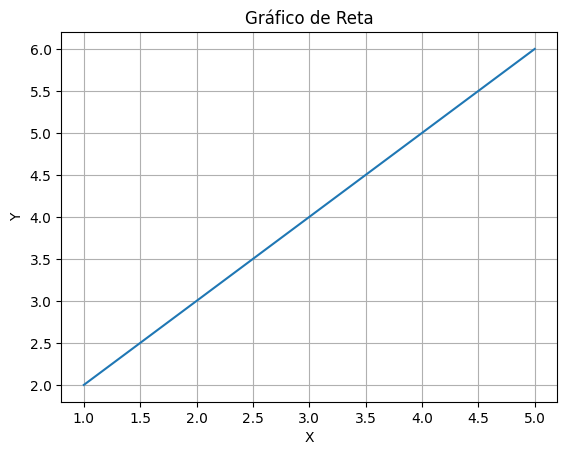

In [39]:
line = PlotStraightLine((1, 2), (5, 6))
line.desenhar_linha()